In [1]:
import netCDF4 as nc
import datetime as dt
import subprocess
import requests
import matplotlib.pyplot as plt
import cmocean
import numpy as np
import os
import glob
import dateutil as dutil
from salishsea_tools import viz_tools, places
%matplotlib inline

In [2]:
jS3,iS3=places.PLACES['S3']['NEMO grid ji']

In [3]:
jSI,iSI=[343,198]

In [4]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as fm:
    tmask=np.copy(fm.variables['tmask'])
    umask=np.copy(fm.variables['umask'])
    vmask=np.copy(fm.variables['vmask'])
    navlon=np.copy(fm.variables['nav_lon'])
    navlat=np.copy(fm.variables['nav_lat'])
    dept=np.copy(fm.variables['gdept_1d'])
    e3t_0=np.copy(fm.variables['e3t_0'])
    e3u_0=np.copy(fm.variables['e3u_0'])
    e3v_0=np.copy(fm.variables['e3v_0'])
    e1t=np.copy(fm.variables['e1t'])
    e2t=np.copy(fm.variables['e2t'])
    e1v=np.copy(fm.variables['e1v'])
    e2u=np.copy(fm.variables['e2u'])
    A=fm.variables['e1t'][0,:,:]*fm.variables['e2t'][0,:,:]*tmask[0,0,:,:]

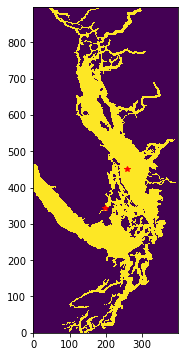

In [5]:
fig,ax=plt.subplots(1,1,figsize=(4,6))
ax.pcolormesh(tmask[0,0,:,:])
ax.plot(iS3,jS3,'r*')
ax.plot(iSI,jSI,'r*')
ax.set_aspect(1)

In [6]:
jpkup=0
for i in range(0,40):
    if dept[0][i]<=15:
        jpkup=i
print(jpkup)
jpkup=jpkup+1
print(jpkup)

14
15


In [7]:
jpkmid=0
for i in range(0,40):
    if dept[0][i]>=15<=50:
        jpkmid=i
print(jpkmid)
jpkmid=jpkmid+1
print(jpkmid)

39
40


In [8]:
jpklo=0
for i in range(0,40):
    if dept[0][i]>=50<=100:
        jpklo=i
print(jpklo)
jpklo=jpklo+1
print(jpklo)

39
40


In [9]:
koff=jpkup 
koff2=jpkmid
koff3=jpklo

In [10]:
t0=dt.datetime(2010,1,1) # 1st start date of run
#te=dt.datetime(2011,12,31)# last start date of runfnum=18
stm=np.shape(tmask)
#nlen=36*2
nlen=730
dlist=[t0+dt.timedelta(days=ii) for ii in range(0,nlen)]

In [11]:
#sdir0='/results/SalishSea/nowcast-green/'
#sdir1='/results/SalishSea/hindcast/'
#sdir3='/data/eolson/MEOPAR/SS36runs/CedarRuns/spring2015_HCMZ/'
#sdir1='/results2/SalishSea/nowcast-green.201905/'
sdir1='/results2/SalishSea/nowcast-green.201905/'

In [12]:
tmaskC=np.copy(tmask)
tmaskC[:,koff:,:,:]=0

In [13]:
tmaskD=np.copy(tmask)
tmaskD[:,koff2:,:,:]=0

In [14]:
tmaskE=np.copy(tmask)
tmaskE[:,koff3:,:,:]=0

In [15]:
tlist=dlist
idir=sdir1
fformat1='%d%b%y/'
fformatT='SalishSea_1d_%Y%m%d_%Y%m%d_dia2_T.nc'
fformatP='SalishSea_1d_%Y%m%d_%Y%m%d_carp_T.nc'
meanMESZDS3up=np.zeros((len(tlist),))
meanMESZDS3mid=np.zeros((len(tlist),))
meanMESZDS3lo=np.zeros((len(tlist),))
meanMESZDSIup=np.zeros((len(tlist),))
meanMESZDSImid=np.zeros((len(tlist),))
meanMESZDSIlo=np.zeros((len(tlist),))
ind=-1
for idt0 in tlist:
    ind=ind+1
    cdir=idt0.strftime(fformat1).lower()
    iffT=idt0.strftime(fformatT)
    iffP=idt0.strftime(fformatP)
    sffT=idir+cdir+iffT
    sffP=idir+cdir+iffP
    f=nc.Dataset(glob.glob(sffT)[0])
    if ind%15==0: print(sffT) 
    fP=nc.Dataset(glob.glob(sffP)[0])
    #e3t=fP.variables['e3t'][:2,:,:,:]
    Vol=A*e3t_0
    meanMESZDS3up[ind]=np.sum(tmaskC[0,:,jS3,iS3]*Vol[0,:,jS3,iS3]*f.variables['GRMESZDIAT'][0,:,jS3,iS3])/\
            np.sum(tmaskC[0,:,jS3,iS3]*Vol[0,:,jS3,iS3])#mmol/m3
    meanMESZDS3mid[ind]=np.sum(tmaskD[0,:,jS3,iS3]*Vol[0,:,jS3,iS3]*f.variables['GRMESZDIAT'][0,:,jS3,iS3])/\
            np.sum(tmaskD[0,:,jS3,iS3]*Vol[0,:,jS3,iS3])#mmol/m3
    meanMESZDS3lo[ind]=np.sum(tmaskE[0,:,jS3,iS3]*Vol[0,:,jS3,iS3]*f.variables['GRMESZDIAT'][0,:,jS3,iS3])/\
            np.sum(tmaskE[0,:,jS3,iS3]*Vol[0,:,jS3,iS3])#mmol/m3
    meanMESZDSIup[ind]=np.sum(tmaskC[0,:,jSI,iSI]*Vol[0,:,jSI,iSI]*f.variables['GRMESZDIAT'][0,:,jSI,iSI])/\
            np.sum(tmaskC[0,:,jSI,iSI]*Vol[0,:,jSI,iSI])#mmol/m3
    meanMESZDSImid[ind]=np.sum(tmaskD[0,:,jSI,iSI]*Vol[0,:,jSI,iSI]*f.variables['GRMESZDIAT'][0,:,jSI,iSI])/\
            np.sum(tmaskD[0,:,jSI,iSI]*Vol[0,:,jSI,iSI])#mmol/m3
    meanMESZDSIlo[ind]=np.sum(tmaskE[0,:,jSI,iSI]*Vol[0,:,jSI,iSI]*f.variables['GRMESZDIAT'][0,:,jSI,iSI])/\
            np.sum(tmaskE[0,:,jSI,iSI]*Vol[0,:,jSI,iSI])#mmol/m3

    
    f.close()
    fP.close()

/results2/SalishSea/nowcast-green.201905/01jan10/SalishSea_1d_20100101_20100101_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/16jan10/SalishSea_1d_20100116_20100116_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/31jan10/SalishSea_1d_20100131_20100131_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/15feb10/SalishSea_1d_20100215_20100215_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/02mar10/SalishSea_1d_20100302_20100302_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/17mar10/SalishSea_1d_20100317_20100317_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/01apr10/SalishSea_1d_20100401_20100401_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/16apr10/SalishSea_1d_20100416_20100416_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/01may10/SalishSea_1d_20100501_20100501_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/16may10/SalishSea_1d_20100516_20100516_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/31may10/SalishSea_1d_20100531_20100531_dia2_T.nc
/results2/

In [16]:
tlist=dlist
idir=sdir1
fformat1='%d%b%y/'
fformatT='SalishSea_1d_%Y%m%d_%Y%m%d_dia2_T.nc'
fformatP='SalishSea_1d_%Y%m%d_%Y%m%d_carp_T.nc'
meanMESZFS3up=np.zeros((len(tlist),))
meanMESZFS3mid=np.zeros((len(tlist),))
meanMESZFS3lo=np.zeros((len(tlist),))
meanMESZFSIup=np.zeros((len(tlist),))
meanMESZFSImid=np.zeros((len(tlist),))
meanMESZFSIlo=np.zeros((len(tlist),))
ind=-1
for idt0 in tlist:
    ind=ind+1
    cdir=idt0.strftime(fformat1).lower()
    iffT=idt0.strftime(fformatT)
    iffP=idt0.strftime(fformatP)
    sffT=idir+cdir+iffT
    sffP=idir+cdir+iffP
    f=nc.Dataset(glob.glob(sffT)[0])
    if ind%15==0: print(sffT) 
    fP=nc.Dataset(glob.glob(sffP)[0])
    #e3t=fP.variables['e3t'][:2,:,:,:]
    Vol=A*e3t_0
    meanMESZFS3up[ind]=np.sum(tmaskC[0,:,jS3,iS3]*Vol[0,:,jS3,iS3]*f.variables['GRMESZPHY'][0,:,jS3,iS3])/\
            np.sum(tmaskC[0,:,jS3,iS3]*Vol[0,:,jS3,iS3])#mmol/m3
    meanMESZFS3mid[ind]=np.sum(tmaskD[0,:,jS3,iS3]*Vol[0,:,jS3,iS3]*f.variables['GRMESZPHY'][0,:,jS3,iS3])/\
            np.sum(tmaskD[0,:,jS3,iS3]*Vol[0,:,jS3,iS3])#mmol/m3
    meanMESZFS3lo[ind]=np.sum(tmaskE[0,:,jS3,iS3]*Vol[0,:,jS3,iS3]*f.variables['GRMESZPHY'][0,:,jS3,iS3])/\
            np.sum(tmaskE[0,:,jS3,iS3]*Vol[0,:,jS3,iS3])#mmol/m3
    meanMESZFSIup[ind]=np.sum(tmaskC[0,:,jSI,iSI]*Vol[0,:,jSI,iSI]*f.variables['GRMESZPHY'][0,:,jSI,iSI])/\
            np.sum(tmaskC[0,:,jSI,iSI]*Vol[0,:,jSI,iSI])#mmol/m3
    meanMESZFSImid[ind]=np.sum(tmaskD[0,:,jSI,iSI]*Vol[0,:,jSI,iSI]*f.variables['GRMESZPHY'][0,:,jSI,iSI])/\
            np.sum(tmaskD[0,:,jSI,iSI]*Vol[0,:,jSI,iSI])#mmol/m3
    meanMESZFSIlo[ind]=np.sum(tmaskE[0,:,jSI,iSI]*Vol[0,:,jSI,iSI]*f.variables['GRMESZPHY'][0,:,jSI,iSI])/\
            np.sum(tmaskE[0,:,jSI,iSI]*Vol[0,:,jSI,iSI])#mmol/m3
    
    f.close()
    fP.close()

/results2/SalishSea/nowcast-green.201905/01jan10/SalishSea_1d_20100101_20100101_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/16jan10/SalishSea_1d_20100116_20100116_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/31jan10/SalishSea_1d_20100131_20100131_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/15feb10/SalishSea_1d_20100215_20100215_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/02mar10/SalishSea_1d_20100302_20100302_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/17mar10/SalishSea_1d_20100317_20100317_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/01apr10/SalishSea_1d_20100401_20100401_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/16apr10/SalishSea_1d_20100416_20100416_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/01may10/SalishSea_1d_20100501_20100501_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/16may10/SalishSea_1d_20100516_20100516_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/31may10/SalishSea_1d_20100531_20100531_dia2_T.nc
/results2/

In [17]:
tlist=dlist
idir=sdir1
fformat1='%d%b%y/'
fformatT='SalishSea_1d_%Y%m%d_%Y%m%d_dia2_T.nc'
fformatP='SalishSea_1d_%Y%m%d_%Y%m%d_carp_T.nc'
meanMESZMS3up=np.zeros((len(tlist),))
meanMESZMS3mid=np.zeros((len(tlist),))
meanMESZMS3lo=np.zeros((len(tlist),))
meanMESZMSIup=np.zeros((len(tlist),))
meanMESZMSImid=np.zeros((len(tlist),))
meanMESZMSIlo=np.zeros((len(tlist),))
ind=-1
for idt0 in tlist:
    ind=ind+1
    cdir=idt0.strftime(fformat1).lower()
    iffT=idt0.strftime(fformatT)
    iffP=idt0.strftime(fformatP)
    sffT=idir+cdir+iffT
    sffP=idir+cdir+iffP
    f=nc.Dataset(glob.glob(sffT)[0])
    if ind%15==0: print(sffT) 
    fP=nc.Dataset(glob.glob(sffP)[0])
    #e3t=fP.variables['e3t'][:2,:,:,:]
    Vol=A*e3t_0
    meanMESZMS3up[ind]=np.sum(tmaskC[0,:,jS3,iS3]*Vol[0,:,jS3,iS3]*f.variables['GRMESZMICZ'][0,:,jS3,iS3])/\
            np.sum(tmaskC[0,:,jS3,iS3]*Vol[0,:,jS3,iS3])#mmol/m3
    meanMESZMS3mid[ind]=np.sum(tmaskD[0,:,jS3,iS3]*Vol[0,:,jS3,iS3]*f.variables['GRMESZMICZ'][0,:,jS3,iS3])/\
            np.sum(tmaskD[0,:,jS3,iS3]*Vol[0,:,jS3,iS3])#mmol/m3
    meanMESZMS3lo[ind]=np.sum(tmaskE[0,:,jS3,iS3]*Vol[0,:,jS3,iS3]*f.variables['GRMESZMICZ'][0,:,jS3,iS3])/\
            np.sum(tmaskE[0,:,jS3,iS3]*Vol[0,:,jS3,iS3])#mmol/m3
    meanMESZMSIup[ind]=np.sum(tmaskC[0,:,jSI,iSI]*Vol[0,:,jSI,iSI]*f.variables['GRMESZMICZ'][0,:,jSI,iSI])/\
            np.sum(tmaskC[0,:,jSI,iSI]*Vol[0,:,jSI,iSI])#mmol/m3
    meanMESZMSImid[ind]=np.sum(tmaskD[0,:,jSI,iSI]*Vol[0,:,jSI,iSI]*f.variables['GRMESZMICZ'][0,:,jSI,iSI])/\
            np.sum(tmaskD[0,:,jSI,iSI]*Vol[0,:,jSI,iSI])#mmol/m3
    meanMESZMSIlo[ind]=np.sum(tmaskE[0,:,jSI,iSI]*Vol[0,:,jSI,iSI]*f.variables['GRMESZMICZ'][0,:,jSI,iSI])/\
            np.sum(tmaskE[0,:,jSI,iSI]*Vol[0,:,jSI,iSI])#mmol/m3
    
    f.close()
    fP.close()

/results2/SalishSea/nowcast-green.201905/01jan10/SalishSea_1d_20100101_20100101_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/16jan10/SalishSea_1d_20100116_20100116_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/31jan10/SalishSea_1d_20100131_20100131_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/15feb10/SalishSea_1d_20100215_20100215_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/02mar10/SalishSea_1d_20100302_20100302_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/17mar10/SalishSea_1d_20100317_20100317_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/01apr10/SalishSea_1d_20100401_20100401_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/16apr10/SalishSea_1d_20100416_20100416_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/01may10/SalishSea_1d_20100501_20100501_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/16may10/SalishSea_1d_20100516_20100516_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/31may10/SalishSea_1d_20100531_20100531_dia2_T.nc
/results2/

In [18]:
tlist=dlist
idir=sdir1
fformat1='%d%b%y/'
fformatT='SalishSea_1d_%Y%m%d_%Y%m%d_dia2_T.nc'
fformatP='SalishSea_1d_%Y%m%d_%Y%m%d_carp_T.nc'
meanMESZCS3up=np.zeros((len(tlist),))
meanMESZCS3mid=np.zeros((len(tlist),))
meanMESZCS3lo=np.zeros((len(tlist),))
meanMESZCSIup=np.zeros((len(tlist),))
meanMESZCSImid=np.zeros((len(tlist),))
meanMESZCSIlo=np.zeros((len(tlist),))
ind=-1
for idt0 in tlist:
    ind=ind+1
    cdir=idt0.strftime(fformat1).lower()
    iffT=idt0.strftime(fformatT)
    iffP=idt0.strftime(fformatP)
    sffT=idir+cdir+iffT
    sffP=idir+cdir+iffP
    f=nc.Dataset(glob.glob(sffT)[0])
    if ind%15==0: print(sffT) 
    fP=nc.Dataset(glob.glob(sffP)[0])
    #e3t=fP.variables['e3t'][:2,:,:,:]
    Vol=A*e3t_0
    meanMESZCS3up[ind]=np.sum(tmaskC[0,:,jS3,iS3]*Vol[0,:,jS3,iS3]*f.variables['GRMESZMRUB'][0,:,jS3,iS3])/\
            np.sum(tmaskC[0,:,jS3,iS3]*Vol[0,:,jS3,iS3])#mmol/m3
    meanMESZCS3mid[ind]=np.sum(tmaskD[0,:,jS3,iS3]*Vol[0,:,jS3,iS3]*f.variables['GRMESZMRUB'][0,:,jS3,iS3])/\
            np.sum(tmaskD[0,:,jS3,iS3]*Vol[0,:,jS3,iS3])#mmol/m3
    meanMESZCS3lo[ind]=np.sum(tmaskE[0,:,jS3,iS3]*Vol[0,:,jS3,iS3]*f.variables['GRMESZMRUB'][0,:,jS3,iS3])/\
            np.sum(tmaskE[0,:,jS3,iS3]*Vol[0,:,jS3,iS3])#mmol/m3
    meanMESZCSIup[ind]=np.sum(tmaskC[0,:,jSI,iSI]*Vol[0,:,jSI,iSI]*f.variables['GRMESZMRUB'][0,:,jSI,iSI])/\
            np.sum(tmaskC[0,:,jSI,iSI]*Vol[0,:,jSI,iSI])#mmol/m3
    meanMESZCSImid[ind]=np.sum(tmaskD[0,:,jSI,iSI]*Vol[0,:,jSI,iSI]*f.variables['GRMESZMRUB'][0,:,jSI,iSI])/\
            np.sum(tmaskD[0,:,jSI,iSI]*Vol[0,:,jSI,iSI])#mmol/m3
    meanMESZCSIlo[ind]=np.sum(tmaskE[0,:,jSI,iSI]*Vol[0,:,jSI,iSI]*f.variables['GRMESZMRUB'][0,:,jSI,iSI])/\
            np.sum(tmaskE[0,:,jSI,iSI]*Vol[0,:,jSI,iSI])#mmol/m3
    
    f.close()
    fP.close()

/results2/SalishSea/nowcast-green.201905/01jan10/SalishSea_1d_20100101_20100101_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/16jan10/SalishSea_1d_20100116_20100116_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/31jan10/SalishSea_1d_20100131_20100131_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/15feb10/SalishSea_1d_20100215_20100215_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/02mar10/SalishSea_1d_20100302_20100302_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/17mar10/SalishSea_1d_20100317_20100317_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/01apr10/SalishSea_1d_20100401_20100401_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/16apr10/SalishSea_1d_20100416_20100416_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/01may10/SalishSea_1d_20100501_20100501_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/16may10/SalishSea_1d_20100516_20100516_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/31may10/SalishSea_1d_20100531_20100531_dia2_T.nc
/results2/

In [19]:
tlist=dlist
idir=sdir1
fformat1='%d%b%y/'
fformatT='SalishSea_1d_%Y%m%d_%Y%m%d_dia2_T.nc'
fformatP='SalishSea_1d_%Y%m%d_%Y%m%d_carp_T.nc'
meanMESZPS3up=np.zeros((len(tlist),))
meanMESZPS3mid=np.zeros((len(tlist),))
meanMESZPS3lo=np.zeros((len(tlist),))
meanMESZPSIup=np.zeros((len(tlist),))
meanMESZPSImid=np.zeros((len(tlist),))
meanMESZPSIlo=np.zeros((len(tlist),))
ind=-1
for idt0 in tlist:
    ind=ind+1
    cdir=idt0.strftime(fformat1).lower()
    iffT=idt0.strftime(fformatT)
    iffP=idt0.strftime(fformatP)
    sffT=idir+cdir+iffT
    sffP=idir+cdir+iffP
    f=nc.Dataset(glob.glob(sffT)[0])
    if ind%15==0: print(sffT) 
    fP=nc.Dataset(glob.glob(sffP)[0])
    #e3t=fP.variables['e3t'][:2,:,:,:]
    Vol=A*e3t_0
    meanMESZPS3up[ind]=np.sum(tmaskC[0,:,jS3,iS3]*Vol[0,:,jS3,iS3]*f.variables['GRMESZPON'][0,:,jS3,iS3])/\
            np.sum(tmaskC[0,:,jS3,iS3]*Vol[0,:,jS3,iS3])#mmol/m3
    meanMESZPS3mid[ind]=np.sum(tmaskD[0,:,jS3,iS3]*Vol[0,:,jS3,iS3]*f.variables['GRMESZPON'][0,:,jS3,iS3])/\
            np.sum(tmaskD[0,:,jS3,iS3]*Vol[0,:,jS3,iS3])#mmol/m3
    meanMESZPS3lo[ind]=np.sum(tmaskE[0,:,jS3,iS3]*Vol[0,:,jS3,iS3]*f.variables['GRMESZPON'][0,:,jS3,iS3])/\
            np.sum(tmaskE[0,:,jS3,iS3]*Vol[0,:,jS3,iS3])#mmol/m3
    meanMESZPSIup[ind]=np.sum(tmaskC[0,:,jSI,iSI]*Vol[0,:,jSI,iSI]*f.variables['GRMESZPON'][0,:,jSI,iSI])/\
            np.sum(tmaskC[0,:,jSI,iSI]*Vol[0,:,jSI,iSI])#mmol/m3
    meanMESZPSImid[ind]=np.sum(tmaskD[0,:,jSI,iSI]*Vol[0,:,jSI,iSI]*f.variables['GRMESZPON'][0,:,jSI,iSI])/\
            np.sum(tmaskD[0,:,jSI,iSI]*Vol[0,:,jSI,iSI])#mmol/m3
    meanMESZPSIlo[ind]=np.sum(tmaskE[0,:,jSI,iSI]*Vol[0,:,jSI,iSI]*f.variables['GRMESZPON'][0,:,jSI,iSI])/\
            np.sum(tmaskE[0,:,jSI,iSI]*Vol[0,:,jSI,iSI])#mmol/m3
    
    f.close()
    fP.close()

/results2/SalishSea/nowcast-green.201905/01jan10/SalishSea_1d_20100101_20100101_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/16jan10/SalishSea_1d_20100116_20100116_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/31jan10/SalishSea_1d_20100131_20100131_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/15feb10/SalishSea_1d_20100215_20100215_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/02mar10/SalishSea_1d_20100302_20100302_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/17mar10/SalishSea_1d_20100317_20100317_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/01apr10/SalishSea_1d_20100401_20100401_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/16apr10/SalishSea_1d_20100416_20100416_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/01may10/SalishSea_1d_20100501_20100501_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/16may10/SalishSea_1d_20100516_20100516_dia2_T.nc
/results2/SalishSea/nowcast-green.201905/31may10/SalishSea_1d_20100531_20100531_dia2_T.nc
/results2/

In [20]:
meanMESZtotalS3up=meanMESZDS3up+meanMESZFS3up+meanMESZCS3up+meanMESZMS3up
meanMESZtotalS3mid=meanMESZDS3mid+meanMESZFS3mid+meanMESZCS3mid+meanMESZMS3mid
meanMESZtotalS3lo=meanMESZDS3lo+meanMESZFS3lo+meanMESZCS3lo+meanMESZMS3lo
meanMESZtotalSIup=meanMESZDSIup+meanMESZFSIup+meanMESZCSIup+meanMESZMSIup
meanMESZtotalSImid=meanMESZDSImid+meanMESZFSImid+meanMESZCSImid+meanMESZMSImid
meanMESZtotalSIlo=meanMESZDSIlo+meanMESZFSIlo+meanMESZCSIlo+meanMESZMSIlo

Text(0.5, 1.0, 'Saanich Inlet Mesozooplankton Feeding (50-100 m)')

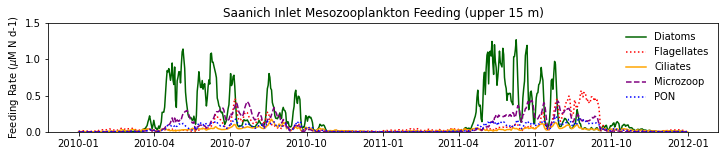

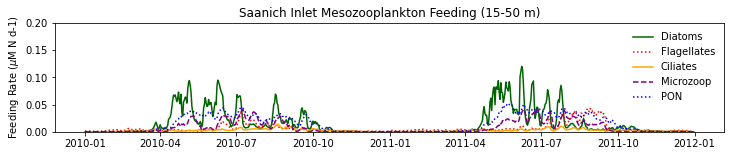

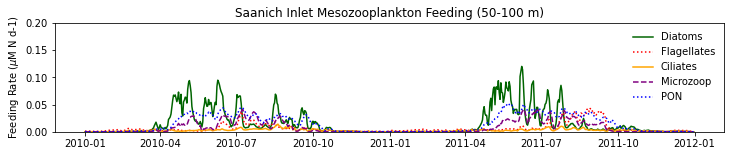

In [26]:
fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(tlist,(meanMESZDSIup*86400),'-',color='darkgreen',label='Diatoms')
ax.plot(tlist,(meanMESZFSIup*86400),':',color='red',label='Flagellates')
ax.plot(tlist,(meanMESZCSIup*86400),'-',color='orange',label='Ciliates')
ax.plot(tlist,(meanMESZMSIup*86400),'--',color='purple',label='Microzoop')
ax.plot(tlist,(meanMESZPSIup*86400),':',color='blue',label='PON')

ax.legend(frameon=False)
ax.set_ylim((0,1.5))
ax.set_ylabel('Feeding Rate ($\mu$M N d-1)')
ax.set_title('Saanich Inlet Mesozooplankton Feeding (upper 15 m)')

fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(tlist,(meanMESZDSImid*86400),'-',color='darkgreen',label='Diatoms')
ax.plot(tlist,(meanMESZFSImid*86400),':',color='red',label='Flagellates')
ax.plot(tlist,(meanMESZCSImid*86400),'-',color='orange',label='Ciliates')
ax.plot(tlist,(meanMESZMSImid*86400),'--',color='purple',label='Microzoop')
ax.plot(tlist,(meanMESZPSImid*86400),':',color='blue',label='PON')
ax.legend(frameon=False)
ax.set_ylim((0,.2))
ax.set_ylabel('Feeding Rate ($\mu$M N d-1)')
ax.set_title('Saanich Inlet Mesozooplankton Feeding (15-50 m)')

fig,ax=plt.subplots(1,1,figsize=(12,2))
ax.plot(tlist,(meanMESZDSIlo*86400),'-',color='darkgreen',label='Diatoms')
ax.plot(tlist,(meanMESZFSIlo*86400),':',color='red',label='Flagellates')
ax.plot(tlist,(meanMESZCSIlo*86400),'-',color='orange',label='Ciliates')
ax.plot(tlist,(meanMESZMSIlo*86400),'--',color='purple',label='Microzoop')
ax.plot(tlist,(meanMESZPSIlo*86400),':',color='blue',label='PON')
ax.legend(frameon=False)
ax.set_ylim((0,.2))
ax.set_ylabel('Feeding Rate ($\mu$M N d-1)')
ax.set_title('Saanich Inlet Mesozooplankton Feeding (50-100 m)')